### I. Imports et chargement

In [ ]:
!pip install ultralytics

In [ ]:
import zipfile
import os
from ultralytics import YOLO
from IPython.display import Image
from PIL import Image as PILImage
from IPython.display import display
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Tire Dataset.v2i.yolov8.zip to Tire Dataset.v2i.yolov8.zip


### II. Préparation et vérification du jeu de données

In [ ]:
zip_path = 'Tire Dataset.v2i.yolov8.zip'
extract_path = '/content/dataset'

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction terminée. Les fichiers sont dans :", extract_path)

Extraction terminée. Les fichiers sont dans : /content/dataset


In [ ]:
# Rename the 'valid' directory to 'val' to match YOLOv8 expected structure
os.rename('/content/dataset/valid', '/content/dataset/val')

In [ ]:
# Open and read a specific label file
with open('/content/dataset/train/labels/1001_png.rf.05300e4f0f2316063d99d0ca39a76ca6.txt') as f:
    lines = f.readlines()
    print("Contenu du fichier :")
    print(lines)

# Extract unique class IDs from the label file
class_ids = [line.strip().split()[0] for line in lines]
unique_ids = sorted(set(class_ids))
print("\nClasses utilisées dans ce fichier :", unique_ids)

Contenu du fichier :
['0 0.21328125 0.24453125 0.4265625 0.4890625\n', '0 0.7546875 0.24453125 0.490625 0.4890625\n', '0 0.4078125 0.58671875 0.171875 0.1953125\n', '0 0.4796875 0.859375 0.059375 0.28125\n', '0 0.7546875 0.74453125 0.490625 0.5109375']

Classes utilisées dans ce fichier : ['0']


In [ ]:
# Display the README file content
with open('/content/dataset/README.roboflow.txt') as f:
    print(f.read())


Tire Dataset - v2 2022-11-21 8:00pm

This dataset was exported via roboflow.com on April 28, 2023 at 12:12 PM GMT

Roboflow is an end-to-end computer vision platform that helps you
* collaborate with your team on computer vision projects
* collect & organize images
* understand and search unstructured image data
* annotate, and create datasets
* export, train, and deploy computer vision models
* use active learning to improve your dataset over time

For state of the art Computer Vision training notebooks you can use with this dataset,
visit https://github.com/roboflow/notebooks

To find over 100k other datasets and pre-trained models, visit https://universe.roboflow.com

The dataset includes 1759 images.
Car-tire are annotated in YOLOv8 format.

The following pre-processing was applied to each image:
* Auto-orientation of pixel data (with EXIF-orientation stripping)
* Resize to 640x640 (Stretch)

The following augmentation was applied to create 3 versions of each source image:
* 50% p

### III. Configuration du fichier data.yaml

In [ ]:
fixed_yaml = """
train: ../train/images
val: ../val/images

nc: 1
names: ['car-tire']

roboflow:
  workspace: iotml
  project: tire-dataset
  version: 2
  license: Public Domain
  url: https://universe.roboflow.com/iotml/tire-dataset/dataset/2
"""

with open('/content/dataset/data.yaml', 'w') as f:
    f.write(fixed_yaml)

### IV. Entraînement du modèle

In [ ]:
model = YOLO("yolov8n.pt")
model.train(data="/content/dataset/data.yaml", epochs=50, imgsz=640)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 308MB/s]


Ultralytics 8.3.104 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

100%|██████████| 755k/755k [00:00<00:00, 146MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 449MB/s]


AMP: checks passed ✅


train: Scanning /content/dataset/train/labels... 1461 images, 7 backgrounds, 0 corrupt: 100%|██████████| 1461/1461 [00:00<00:00, 1556.67it/s]

train: New cache created: /content/dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/dataset/val/labels... 190 images, 1 backgrounds, 0 corrupt: 100%|██████████| 190/190 [00:00<00:00, 1335.79it/s]

val: New cache created: /content/dataset/val/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.21G     0.7996      1.515      1.212         31        640: 100%|██████████| 92/92 [00:10<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.40it/s]

                   all        190        268      0.695      0.646      0.735      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.74G     0.7861      1.101      1.165         63        640: 100%|██████████| 92/92 [00:08<00:00, 11.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.42it/s]

                   all        190        268      0.351      0.424      0.277     0.0994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.77G     0.7749      1.007      1.161         27        640: 100%|██████████| 92/92 [00:08<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.71it/s]

                   all        190        268      0.401      0.444      0.325     0.0848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.78G     0.7468     0.9517      1.143         27        640: 100%|██████████| 92/92 [00:08<00:00, 11.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.85it/s]

                   all        190        268      0.688      0.627      0.657      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       2.8G     0.7028      0.878      1.122         30        640: 100%|██████████| 92/92 [00:08<00:00, 11.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.18it/s]

                   all        190        268       0.84      0.801      0.851      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.82G     0.6884     0.8503      1.109         35        640: 100%|██████████| 92/92 [00:08<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.94it/s]

                   all        190        268      0.805      0.817      0.845      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.83G     0.6756     0.8212      1.106         44        640: 100%|██████████| 92/92 [00:07<00:00, 11.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.01it/s]

                   all        190        268      0.717      0.705      0.738       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.85G     0.6514     0.7986       1.09         61        640: 100%|██████████| 92/92 [00:08<00:00, 11.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.99it/s]

                   all        190        268      0.725      0.828      0.801      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.87G     0.6427     0.7673       1.08         33        640: 100%|██████████| 92/92 [00:08<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.03it/s]

                   all        190        268      0.732      0.797      0.798      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.88G      0.628     0.7466      1.067         35        640: 100%|██████████| 92/92 [00:07<00:00, 11.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.06it/s]

                   all        190        268      0.873      0.862      0.905      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       2.9G     0.6311     0.7348      1.073         48        640: 100%|██████████| 92/92 [00:07<00:00, 11.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.14it/s]

                   all        190        268      0.817      0.768      0.839       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.92G     0.6162     0.7167      1.064         33        640: 100%|██████████| 92/92 [00:08<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.15it/s]

                   all        190        268      0.765      0.827      0.837      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.94G     0.5921     0.6892      1.053         27        640: 100%|██████████| 92/92 [00:08<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.16it/s]

                   all        190        268      0.875      0.884      0.919      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.95G     0.5795     0.6774      1.051         32        640: 100%|██████████| 92/92 [00:08<00:00, 11.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.09it/s]

                   all        190        268      0.758      0.825      0.821      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.97G      0.601     0.6795      1.056         31        640: 100%|██████████| 92/92 [00:07<00:00, 11.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.28it/s]

                   all        190        268      0.923      0.765      0.899      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.99G     0.5837     0.6762       1.05         32        640: 100%|██████████| 92/92 [00:08<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.20it/s]

                   all        190        268      0.914       0.84      0.909      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         3G     0.5587     0.6287       1.04         30        640: 100%|██████████| 92/92 [00:08<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.20it/s]

                   all        190        268      0.866      0.872      0.914      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.02G      0.587     0.6597      1.042         39        640: 100%|██████████| 92/92 [00:07<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.02it/s]

                   all        190        268      0.757      0.843      0.866      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.04G     0.5633     0.6301      1.042         23        640: 100%|██████████| 92/92 [00:08<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.81it/s]

                   all        190        268      0.901      0.776      0.888      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.05G      0.554     0.6182      1.039         35        640: 100%|██████████| 92/92 [00:07<00:00, 11.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.08it/s]

                   all        190        268      0.812      0.854      0.887      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.07G     0.5349     0.5991      1.023         32        640: 100%|██████████| 92/92 [00:08<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.20it/s]

                   all        190        268       0.93      0.817      0.939      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.09G     0.5459       0.61      1.029         34        640: 100%|██████████| 92/92 [00:07<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.02it/s]

                   all        190        268      0.848      0.918      0.941      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.11G     0.5463     0.6119      1.031         26        640: 100%|██████████| 92/92 [00:08<00:00, 11.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.91it/s]

                   all        190        268      0.856      0.884      0.939      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.13G     0.5282     0.5783      1.018         22        640: 100%|██████████| 92/92 [00:07<00:00, 11.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.42it/s]

                   all        190        268      0.906      0.907      0.938      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.14G     0.5348     0.6081       1.02         72        640: 100%|██████████| 92/92 [00:08<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.14it/s]

                   all        190        268      0.877      0.797      0.902      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.16G      0.532     0.5826      1.019         36        640: 100%|██████████| 92/92 [00:08<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.36it/s]

                   all        190        268      0.866      0.913      0.948      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.17G     0.5367     0.5847      1.016         30        640: 100%|██████████| 92/92 [00:08<00:00, 11.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.06it/s]

                   all        190        268       0.93       0.89      0.939       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.19G     0.5073     0.5553      1.005         29        640: 100%|██████████| 92/92 [00:07<00:00, 11.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.31it/s]

                   all        190        268      0.902      0.896      0.938      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.21G     0.5022     0.5568      1.004         28        640: 100%|██████████| 92/92 [00:08<00:00, 11.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.33it/s]

                   all        190        268      0.877      0.828      0.909      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.23G     0.5131     0.5616      1.005         34        640: 100%|██████████| 92/92 [00:08<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.18it/s]

                   all        190        268      0.886      0.895      0.948        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.24G       0.49     0.5468     0.9962         36        640: 100%|██████████| 92/92 [00:07<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.35it/s]

                   all        190        268      0.874      0.882      0.922      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.26G     0.4947     0.5394     0.9984         24        640: 100%|██████████| 92/92 [00:08<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.97it/s]

                   all        190        268       0.87      0.896      0.934      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.28G     0.4924     0.5506      1.005         28        640: 100%|██████████| 92/92 [00:08<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.33it/s]

                   all        190        268      0.848       0.91      0.941      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.29G      0.479     0.5209     0.9921         39        640: 100%|██████████| 92/92 [00:08<00:00, 11.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.05it/s]

                   all        190        268      0.835      0.937      0.955      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.31G     0.4787     0.5253     0.9956         26        640: 100%|██████████| 92/92 [00:07<00:00, 11.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.51it/s]

                   all        190        268      0.927      0.802      0.927      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.33G     0.4588     0.5029     0.9893         35        640: 100%|██████████| 92/92 [00:07<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.02it/s]

                   all        190        268      0.902      0.851      0.935      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.35G     0.4797     0.5293     0.9944         37        640: 100%|██████████| 92/92 [00:08<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.39it/s]

                   all        190        268      0.884      0.869      0.937      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.36G     0.4616     0.5049     0.9873         33        640: 100%|██████████| 92/92 [00:08<00:00, 11.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.19it/s]

                   all        190        268      0.885      0.869      0.932      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.38G     0.4698     0.5068     0.9839         38        640: 100%|██████████| 92/92 [00:08<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.75it/s]

                   all        190        268      0.851      0.948      0.949       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       3.4G     0.4585     0.5026     0.9793         25        640: 100%|██████████| 92/92 [00:08<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.26it/s]

                   all        190        268      0.905      0.886      0.945      0.598


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.42G     0.4657     0.4662      0.986         22        640: 100%|██████████| 92/92 [00:08<00:00, 10.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.77it/s]

                   all        190        268      0.905      0.903      0.954      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.43G     0.4528     0.4363     0.9776         14        640: 100%|██████████| 92/92 [00:07<00:00, 11.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.10it/s]

                   all        190        268      0.901      0.907      0.954      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.45G     0.4463     0.4241     0.9687         18        640: 100%|██████████| 92/92 [00:07<00:00, 11.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.23it/s]

                   all        190        268      0.878      0.883      0.944      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.47G     0.4468     0.4186     0.9685         13        640: 100%|██████████| 92/92 [00:07<00:00, 11.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.27it/s]

                   all        190        268      0.945      0.899      0.959       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.48G     0.4343     0.4044      0.959         15        640: 100%|██████████| 92/92 [00:07<00:00, 12.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.27it/s]

                   all        190        268      0.943      0.907      0.964      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50       3.5G     0.4259     0.3969     0.9601         15        640: 100%|██████████| 92/92 [00:07<00:00, 11.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.51it/s]

                   all        190        268      0.929      0.914       0.96      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.52G     0.4124     0.3879       0.95         16        640: 100%|██████████| 92/92 [00:07<00:00, 11.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.34it/s]

                   all        190        268      0.944      0.881      0.962      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.54G      0.407     0.3737     0.9465         17        640: 100%|██████████| 92/92 [00:07<00:00, 11.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.42it/s]

                   all        190        268      0.917       0.91      0.964      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.55G     0.4017     0.3678     0.9462         15        640: 100%|██████████| 92/92 [00:07<00:00, 12.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.42it/s]

                   all        190        268       0.93      0.894      0.967      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.57G     0.3988     0.3656     0.9479         14        640: 100%|██████████| 92/92 [00:07<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.85it/s]

                   all        190        268      0.955       0.88      0.967       0.65



50 epochs completed in 0.127 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.104 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.17it/s]


                   all        190        268      0.925      0.914       0.96      0.667
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b12f3ff32d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

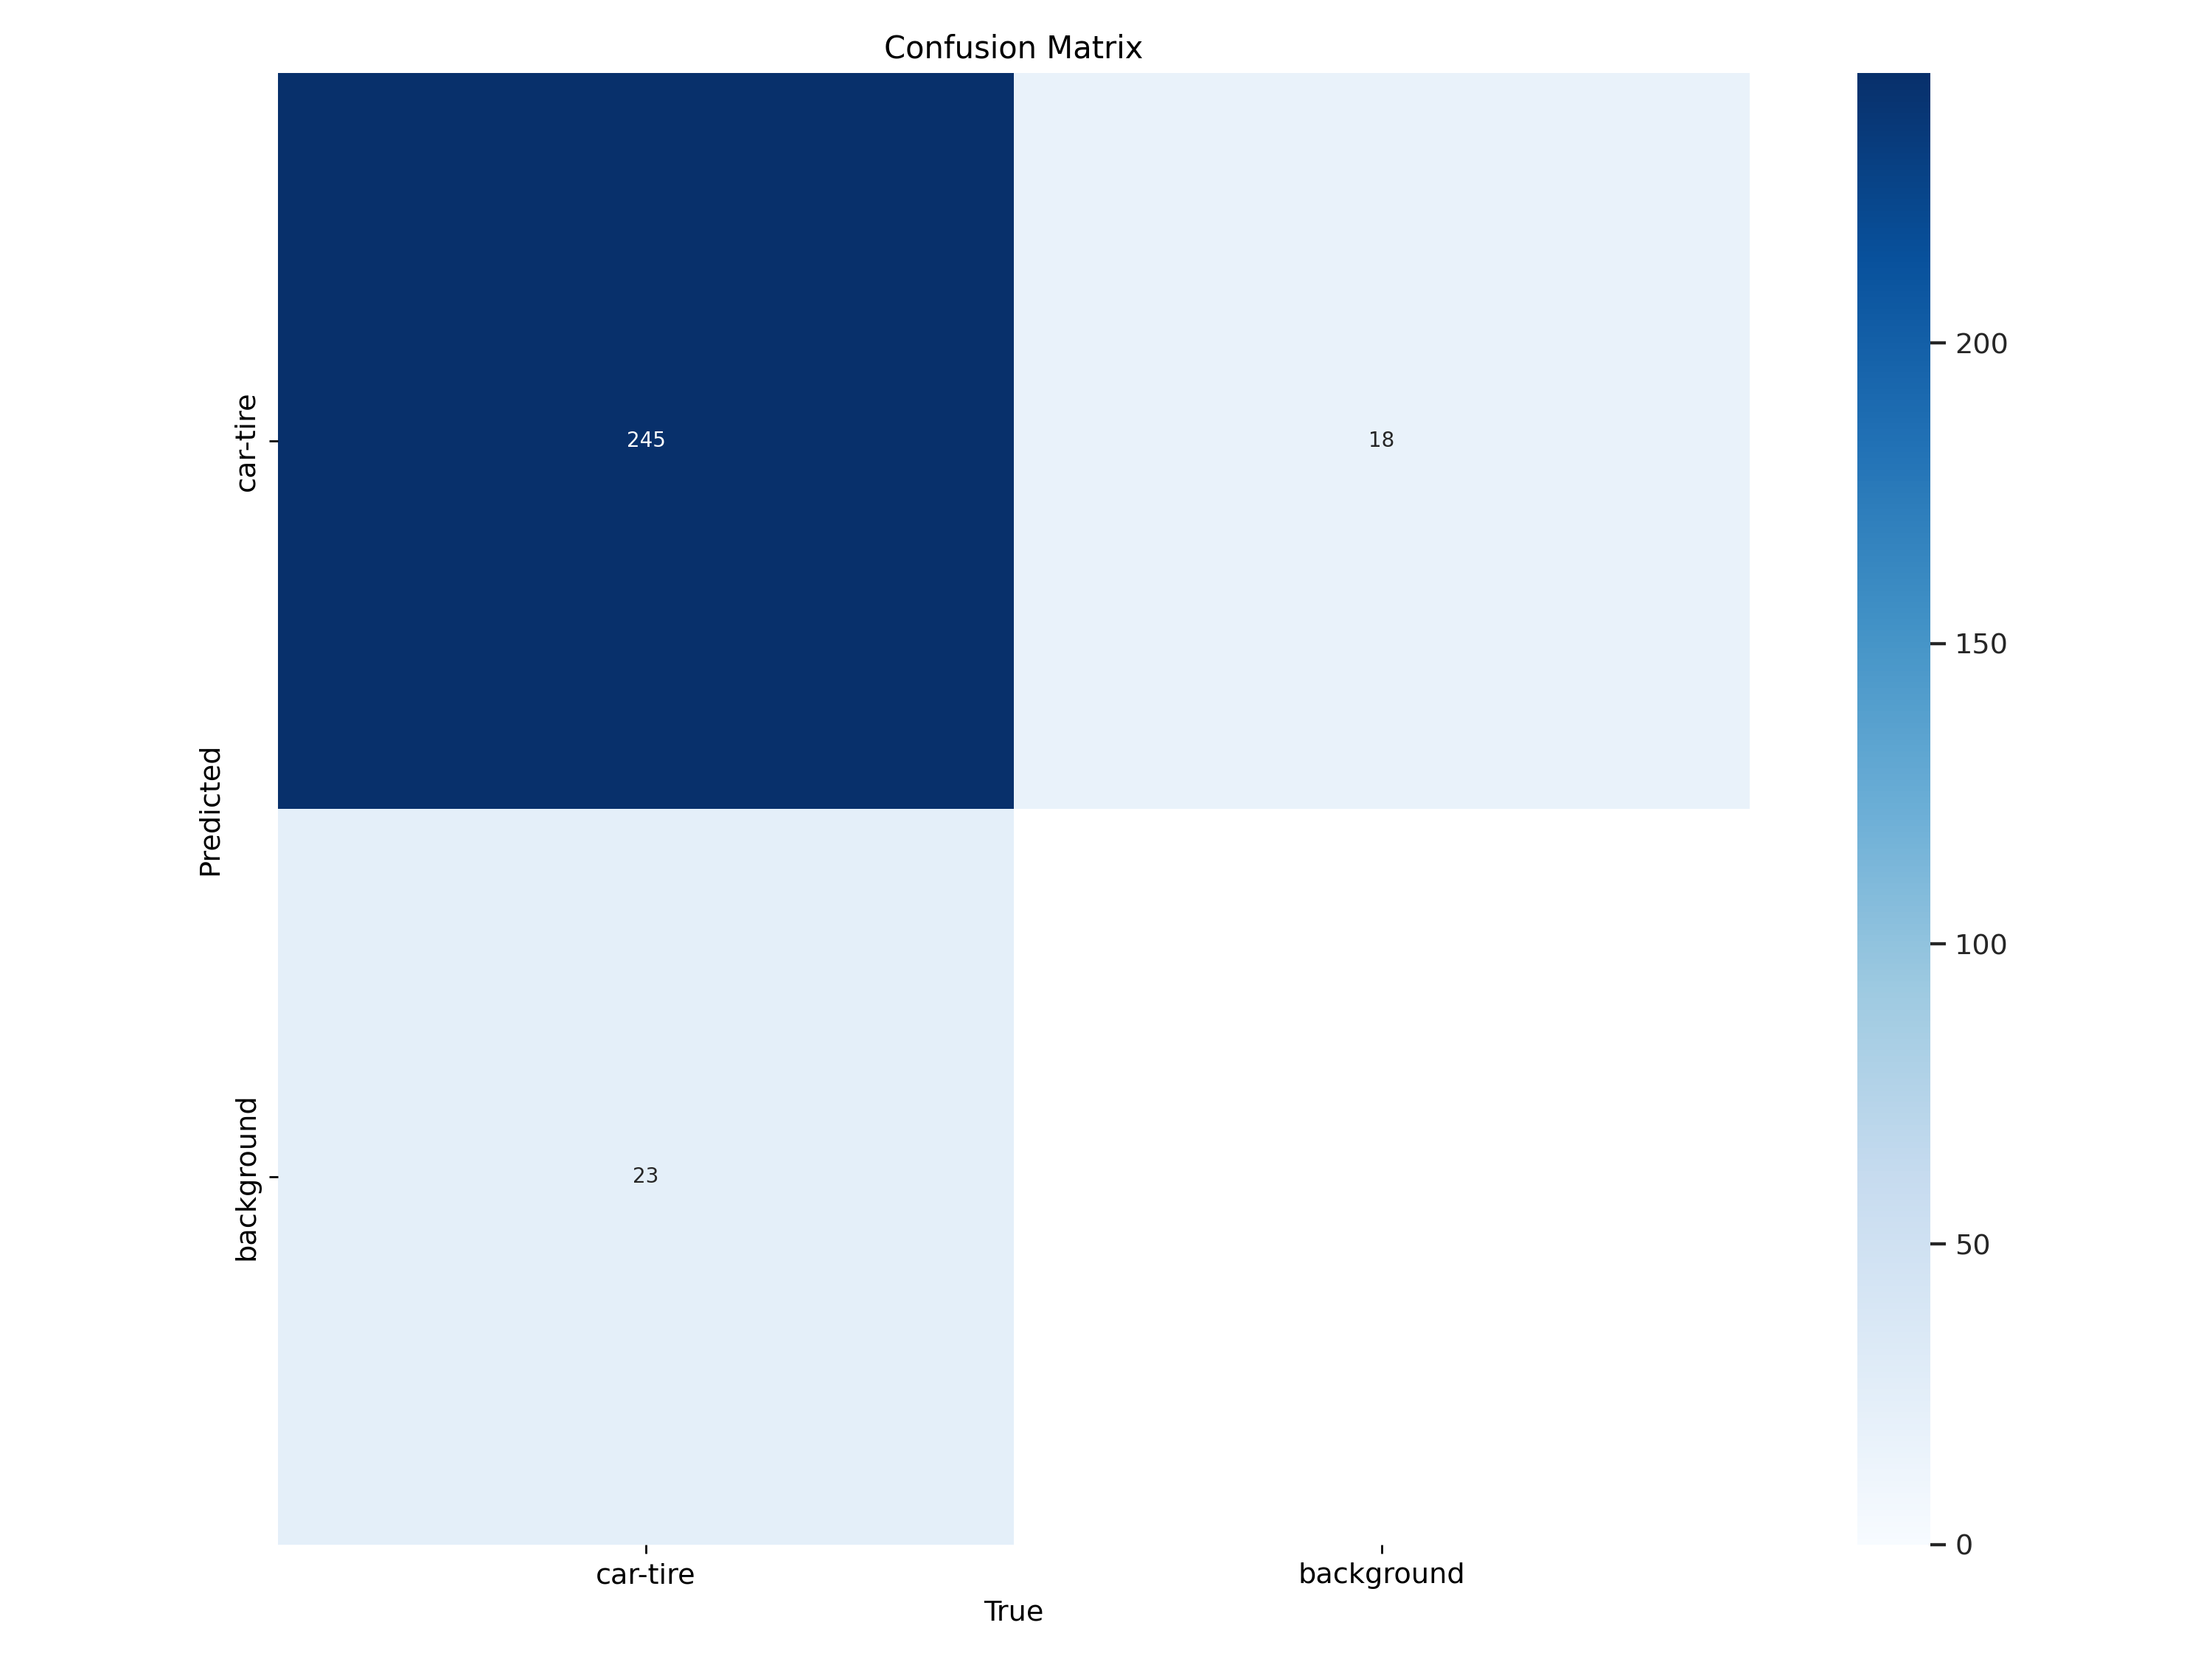

In [ ]:
Image(filename='runs/detect/train/confusion_matrix.png')

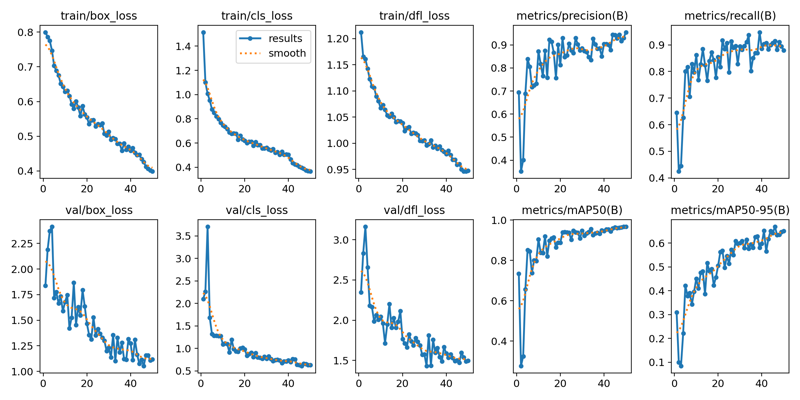

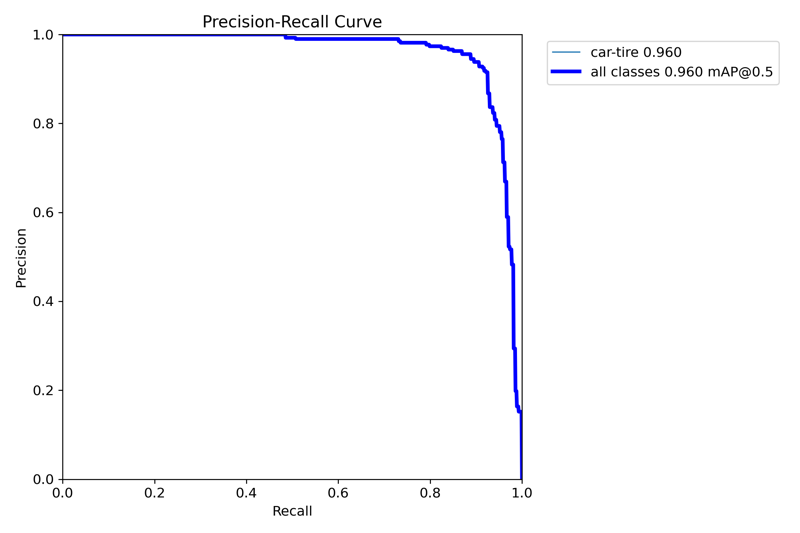

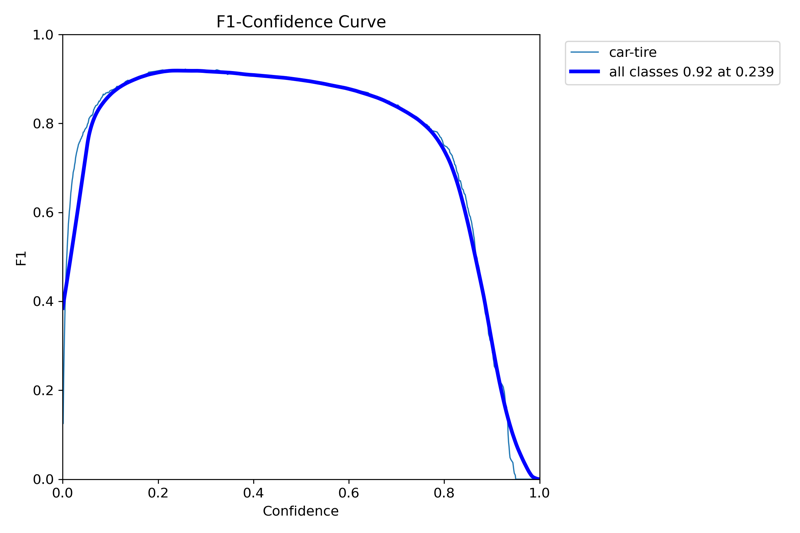

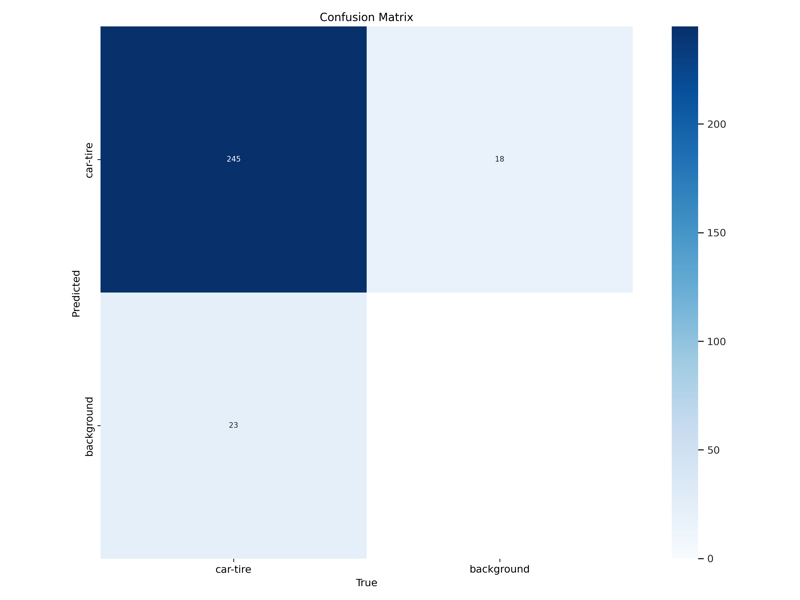

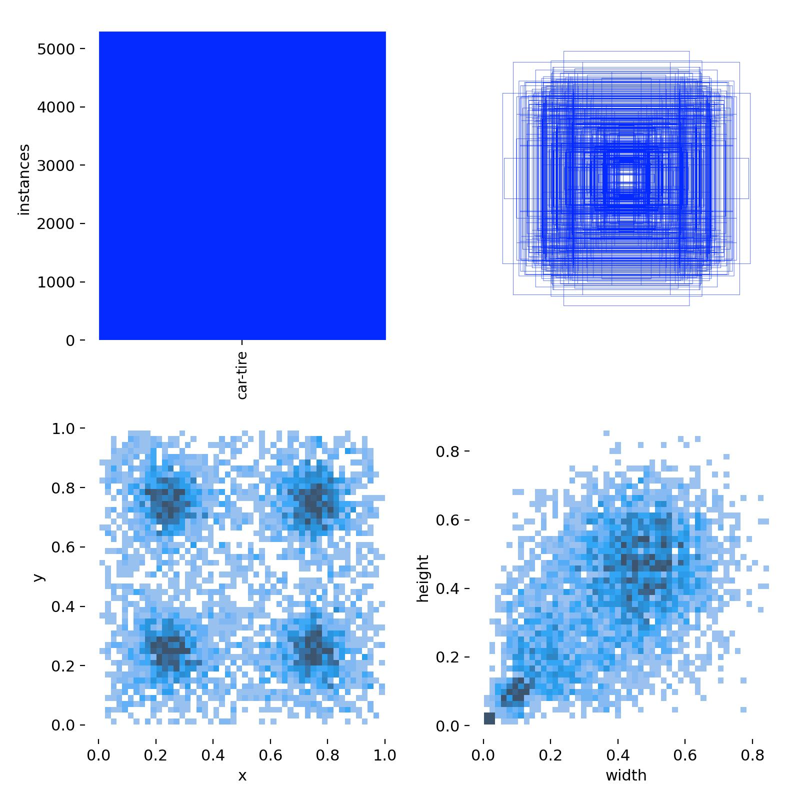

In [ ]:
def display_img(path, width=800):
    img = PILImage.open(path)
    display(img.resize((width, int(img.height * width / img.width))))

# Display training result images with reduced size
display_img('runs/detect/train/results.png')
display_img('runs/detect/train/PR_curve.png')
display_img('runs/detect/train/F1_curve.png')
display_img('runs/detect/train/confusion_matrix.png')
display_img('runs/detect/train/labels.jpg')

### Récapitulatif des métriques – Jeu d’entraînement / validation (YOLOv8)

Les performances du modèle YOLOv8 présentées ci-dessous correspondent aux métriques calculées sur le jeu de validation (val) pendant l’entraînement.

Données d’évaluation :
- Nombre d’images (train/val) : 190  
- Nombre d’instances : 268  

Métriques globales :
- Précision (Precision) : 0.925  
- Rappel (Recall) : 0.914  
- mAP@50 : 0.960  
- mAP@50–95 : 0.667  

Score F1 :
- Score F1 maximal : ≈ 0.92  
- Seuil de confiance associé : ≈ 0.24  

Ces métriques sont issues de la validation automatique effectuée à la fin de l’entraînement et ne correspondent pas à une évaluation sur un jeu de test indépendant.


### V. Evaluation du modèle sur le jeu de test 

> **Note**
>
> Lors de l’entraînement initial du modèle, le fichier `data.yaml` ne contenait pas explicitement de section `test`.  
> En conséquence, les métriques affichées pendant l’entraînement correspondaient uniquement au jeu de validation (`val`).

In [ ]:
model = YOLO("runs/detect/train/weights/best.pt")  
metrics = model.val(data="/content/dataset/data.yaml", split="test")

Ultralytics 8.3.104 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/dataset/test/labels... 103 images, 0 backgrounds, 0 corrupt: 100%|██████████| 103/103 [00:00<00:00, 1480.34it/s]

val: New cache created: /content/dataset/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.85it/s]


                   all        103        154      0.951      0.882      0.948      0.658
Speed: 2.0ms preprocess, 2.6ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val


In [ ]:
# Display validation result images with reduced size
display_img("runs/detect/val/F1_curve.png")
display_img("runs/detect/val/PR_curve.png")
display_img("runs/detect/val/confusion_matrix.png")

# Display ground truth and prediction images
display_img("runs/detect/val/val_batch0_labels.jpg")  
display_img("runs/detect/val/val_batch0_pred.jpg") 

### VI. Comparaison des prédictions du modèle

In [ ]:
def display_side_by_side(img1_path, img2_path, label1="Ground Truth", label2="Prediction"):
    img1 = Image.open(img1_path)
    img2 = Image.open(img2_path)

    _, axs = plt.subplots(1, 2, figsize=(14, 7))
    axs[0].imshow(img1)
    axs[0].set_title(label1, fontsize=14)
    axs[0].axis('off')

    axs[1].imshow(img2)
    axs[1].set_title(label2, fontsize=14)
    axs[1].axis('off')

    plt.tight_layout()
    plt.show()

display_side_by_side(
    "runs/detect/val/val_batch0_labels.jpg",
    "runs/detect/val/val_batch0_pred.jpg"
)

### VII. Test d'inférence

In [ ]:
model = YOLO("runs/detect/train/weights/best.pt")

In [ ]:
results = model.predict(source="/content/auto1.jpg", conf=0.239, save=True)


image 1/1 /content/auto1.jpg: 480x640 1 car-tire, 9.5ms
Speed: 4.2ms preprocess, 9.5ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict


In [ ]:
display(Image.open("runs/detect/predict/auto1.jpg"))

In [ ]:
results = model.predict(source="/content/auto2.jpg", conf=0.239, save=True)
display(Image.open("runs/detect/predict/auto2.jpg"))

In [ ]:
results = model.predict(source="/content/auto3.jpg", conf=0.239, save=True)
display(Image.open("runs/detect/predict/auto3.jpg"))

In [ ]:
results = model.predict(source="/content/auto4.jpg", conf=0.239, save=True)
display(Image.open("runs/detect/predict/auto4.jpg"))

In [ ]:
results = model.predict(source="/content/auto5.jpg", conf=0.239, save=True)
display(Image.open("runs/detect/predict/auto5.jpg"))

In [ ]:
results = model.predict(source="/content/auto6.jpg", conf=0.239, save=True)
display(Image.open("runs/detect/predict/auto6.jpg"))